In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [92]:
data=pd.read_csv('/content/loan_data.csv')
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971,6,RENT,15000,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800,17,RENT,9000,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942,7,RENT,2771,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164,4,RENT,12000,EDUCATION,13.23,0.36,6,604,No,1


In [93]:
data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [94]:
label_encoder = LabelEncoder()
data['person_gender'] = label_encoder.fit_transform(data['person_gender'])
data['person_education']=label_encoder.fit_transform(data['person_education'])
data['person_home_ownership']=label_encoder.fit_transform(data['person_home_ownership'])
data['loan_intent']=label_encoder.fit_transform(data['loan_intent'])
data['previous_loan_defaults_on_file']=label_encoder.fit_transform(data['previous_loan_defaults_on_file'])
data['loan_status']=label_encoder.fit_transform(data['loan_status'])
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,4,71948,0,3,35000,4,16.02,0.49,3,561,0,1
1,21,0,3,12282,0,2,1000,1,11.14,0.08,2,504,1,0
2,25,0,3,12438,3,0,5500,3,12.87,0.44,3,635,0,1
3,23,0,1,79753,0,3,35000,3,15.23,0.44,2,675,0,1
4,24,1,4,66135,1,3,35000,3,14.27,0.53,4,586,0,1


In [95]:
data.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,0.552022,1.743933,8.031905e+04,5.410333,1.696622,9583.157556,2.525911,11.006606,0.139725,5.867489,632.608756,0.507956,0.222222
std,6.045108,0.497292,1.479148,8.042250e+04,6.063532,1.440497,6314.886691,1.728305,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,0.000000,0.000000,8.000000e+03,0.000000,0.000000,500.000000,0.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,4.720400e+04,1.000000,0.000000,5000.000000,1.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,1.000000,1.000000,6.704800e+04,4.000000,3.000000,8000.000000,3.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,1.000000,3.000000,9.578925e+04,8.000000,3.000000,12237.250000,4.000000,12.990000,0.190000,8.000000,670.000000,1.000000,0.000000
max,144.000000,1.000000,4.000000,7.200766e+06,125.000000,3.000000,35000.000000,5.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000


Finding Outliers in Dataset by using Box Plot

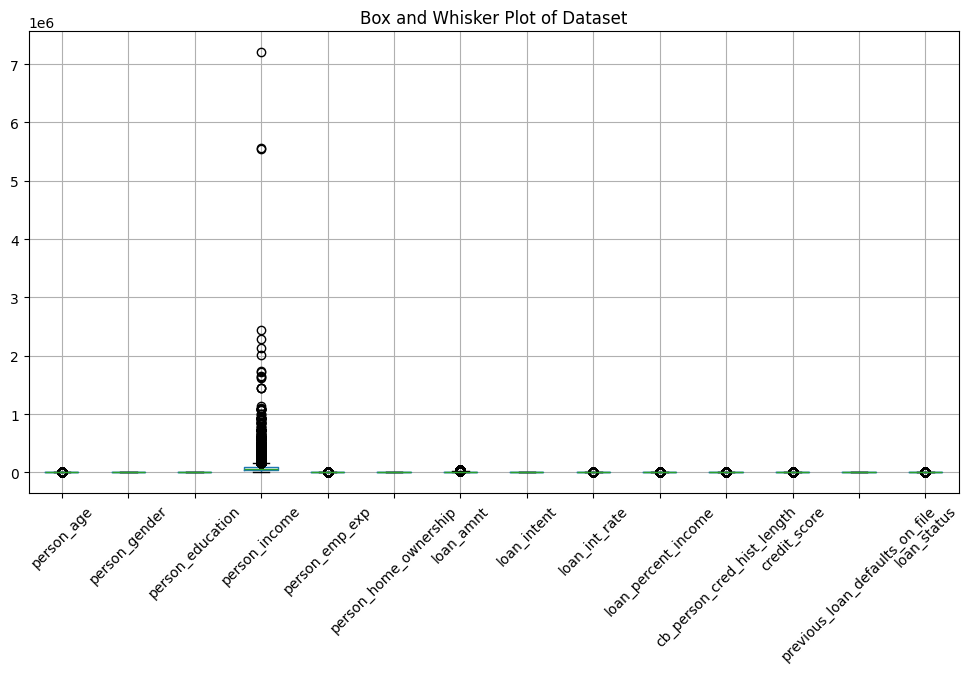

In [96]:
plt.figure(figsize=(12, 6))
data.boxplot()
plt.title('Box and Whisker Plot of Dataset')
plt.xticks(rotation=45)
plt.show()

Handle Outliers in Dataset

In [97]:
Q1 = data['person_age'].quantile(0.25)
Q3 = data['person_age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data= data[(data['person_age'] >= lower_bound) & (data['person_age'] <= upper_bound)]

Q1 = data['person_income'].quantile(0.25)
Q3 = data['person_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data= data[(data['person_income'] >= lower_bound) & (data['person_income'] <= upper_bound)]


In [98]:
Q1 = data['person_emp_exp'].quantile(0.25)
Q3 = data['person_emp_exp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data= data[(data['person_emp_exp'] >= lower_bound) & (data['person_emp_exp'] <= upper_bound)]

In [99]:
Q1 = data['loan_amnt'].quantile(0.25)
Q3 = data['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data= data[(data['loan_amnt'] >= lower_bound) & (data['loan_amnt'] <= upper_bound)]

Q1 = data['loan_int_rate'].quantile(0.25)
Q3 = data['loan_int_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data= data[(data['loan_int_rate'] >= lower_bound) & (data['loan_int_rate'] <= upper_bound)]

Q1 = data['loan_percent_income'].quantile(0.25)
Q3 = data['loan_percent_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data= data[(data['loan_percent_income'] >= lower_bound) & (data['loan_percent_income'] <= upper_bound)]

In [100]:
Q1 = data['cb_person_cred_hist_length'].quantile(0.25)
Q3 = data['cb_person_cred_hist_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data= data[(data['cb_person_cred_hist_length'] >= lower_bound) & (data['cb_person_cred_hist_length'] <= upper_bound)]

In [101]:
Q1 = data['person_age'].quantile(0.25)
Q3 = data['person_age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data= data[(data['person_age'] >= lower_bound) & (data['person_age'] <= upper_bound)]


In [102]:
Q1 = data['credit_score'].quantile(0.25)
Q3 = data['credit_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data= data[(data['credit_score'] >= lower_bound) & (data['credit_score'] <= upper_bound)]

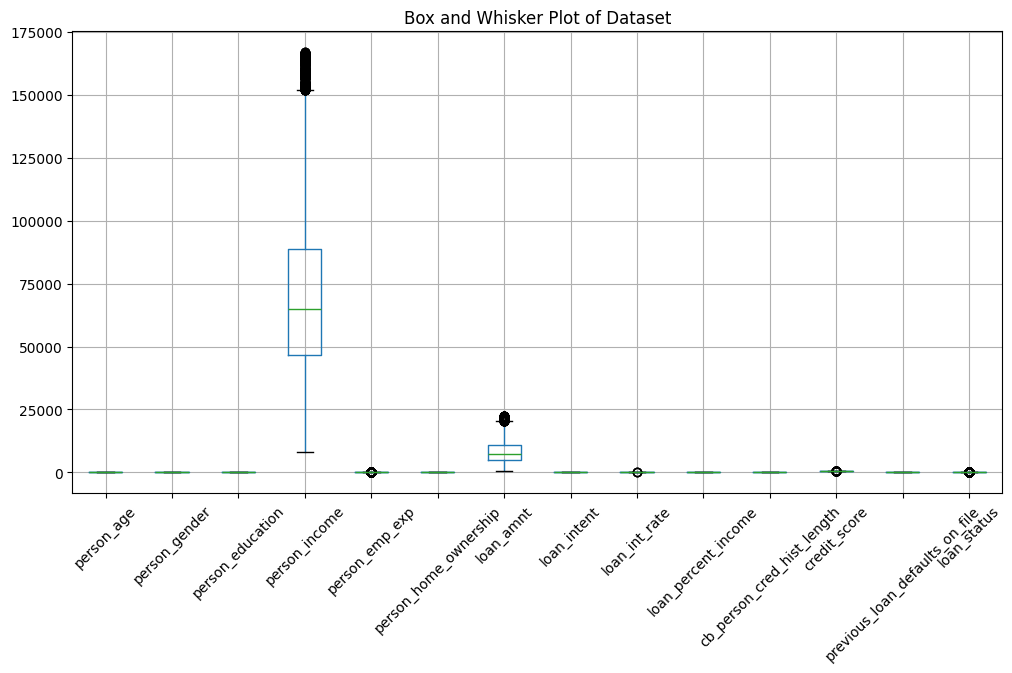

In [103]:
plt.figure(figsize=(12, 6))
data.boxplot()
plt.title('Box and Whisker Plot of Dataset')
plt.xticks(rotation=45)
plt.show()

In [104]:
data.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000
mean,26.379084,0.547344,1.747749,70055.074489,4.049400,1.755473,8276.998527,2.517698,10.881594,0.129749,4.983913,632.061375,0.523533,0.202156
std,3.829388,0.497760,1.480452,31561.541255,3.850273,1.432630,4782.815913,1.726586,2.928076,0.071594,2.633323,47.678613,0.499453,0.401614
min,20.000000,0.000000,0.000000,8000.000000,0.000000,0.000000,500.000000,0.000000,5.420000,0.010000,2.000000,497.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,46455.750000,1.000000,0.000000,4800.000000,1.000000,8.490000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,25.000000,1.000000,1.000000,64791.000000,3.000000,3.000000,7350.000000,3.000000,11.010000,0.120000,4.000000,638.000000,1.000000,0.000000
75%,29.000000,1.000000,3.000000,88576.000000,6.000000,3.000000,11037.750000,4.000000,12.912500,0.180000,7.000000,668.000000,1.000000,0.000000
max,38.000000,1.000000,4.000000,166754.000000,16.000000,3.000000,22500.000000,5.000000,19.690000,0.320000,13.000000,762.000000,1.000000,1.000000


In [105]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
model.coef_

array([[-1.92741709e-01, -9.36950300e-03, -4.74954935e-03,
        -3.67008423e-05,  1.52157094e-01,  3.07466118e-01,
         1.52330707e-04, -3.92037791e-01,  3.68329898e-01,
         1.36759834e-02,  2.64742430e-02,  5.10907100e-04,
        -8.92110891e-01]])

In [107]:
model.intercept_

array([-0.01795516])

In [109]:
y_pred = model.predict(X_test)

In [110]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [111]:
model.score(X_test, y_test)

0.8476177246839839

In [112]:
X_test

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
20067,27,0,2,39675,3,0,4500,2,9.99,0.11,8,549,0
44361,31,0,1,59596,6,3,8457,5,14.18,0.14,9,608,0
4469,25,1,0,49567,1,0,8000,2,5.79,0.16,2,646,1
38112,22,1,0,27047,0,0,1259,2,7.46,0.05,2,596,1
17462,26,0,1,62991,7,2,15000,1,9.88,0.24,4,703,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33117,25,0,4,96927,1,0,18000,1,6.20,0.19,3,657,0
29006,27,0,2,59645,5,3,12000,1,12.53,0.20,8,671,0
36371,24,0,3,36969,0,0,6000,3,13.54,0.16,3,659,1
10085,23,1,0,78992,1,0,20000,1,12.18,0.25,4,655,0


In [114]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [116]:
probabilities = model.predict_proba(X_test)
probabilities

array([[0.89625606, 0.10374394],
       [0.77691465, 0.22308535],
       [0.98848575, 0.01151425],
       ...,
       [0.85365407, 0.14634593],
       [0.40673126, 0.59326874],
       [0.99465176, 0.00534824]])

In [119]:
report  = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5716
           1       0.67      0.50      0.58      1483

    accuracy                           0.85      7199
   macro avg       0.78      0.72      0.74      7199
weighted avg       0.84      0.85      0.84      7199



In [121]:
confusion_matrix(y_test, y_pred)

array([[5355,  361],
       [ 736,  747]])

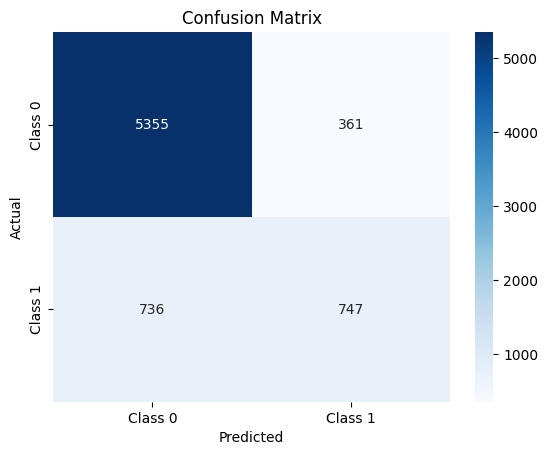

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()